## TW7 Supervised Learning: Classification

Students' names:

- Anjali Sebastian

- Kruta Prabhu

- Kshama Kumar

### Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# to make this notebook's output stable across runs
np.random.seed(42)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"

IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Part0

- Develop a classifier using Decition Trees

    - Use two methods for criterion: Entropy and Gini

- Find important features

- Understand and implement a framework of k-cross validation

- Evaluate model performance

    - Task: Calculate the averages of k-folds

### Dataset 1: iris

#### Extract mportant features from Decition Trees

#### Important features from a decision tree

- Decision tree classifier

https://scikit-learn.org/stable/modules/tree.html#classification

- Metrics

https://scikit-learn.org/stable/modules/model_evaluation.html

#### Train-test split

- A simple way to prepare training-testing data

#### Build a decition tree (with 'entropy' method)

- Important features from a decision tree using information gain measure (entropy)

#### DT visualization

#### Build a decition tree (with 'gini' method)

- Important features from a decision tree using information gain measure (gini)

### k-cross validation

##### Construct a decision tree (default criterion: entropy)

##### k-cross validation and averge the results

### Task: Make a summary of the model performance

<p style='color:red'> 
Conduct k-cross validation and aaverage k folds' results 
</p> 

- For each fold, access performance measures stored in result_metrics_dict. 

- Currently the code shows the content of the dictionary and an example that shows how to access 'precision' measure of a class 'setosa'. 

- Calculate the averages of the following:
    - accuracy
    - precision, recall, and f1-score for each class
    - macro average of precision, recall, and f1-score
    - weighted average of precision, recall, and f1-score

### Our dataset: Us Accidents

## Part 1

The best practice is to define a classification program for the dataset(s) of your term project. 

In case a classification problem is not possibly defined for your datasets, you can use the cancer dataset in the example above. 

#### 1. Construct  a decision tree using the following parameters

- Use information gain (entropy) measure
- max_depth = 2
- Apply k=3 cross validation and print a summary of statistics (performance evaluation) for each fold


#### 2. Construct  a decision tree using the following parameters

- Use information gini measure
- max_depth = 2
- Apply k=3 cross validation and print a summary of statistics (performance evaluation) for each fold

#### 3. Performance comparisons

- Compare the performance results with those of the decision tree using Gini index measure in the above example

#### 4. For both trees, change the following parameters and observe the changes:

- The depth of tree: currently max_depth=2 in the model training step. Change the depth 3, 4, 5 and check if this affects the overall results. 

- The k value for cross validation is currently set to 3. Change k value, k = 5, 7, 10 and check if this affects the overall results. 

### 0. Load a subset of our project  data 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv("US_accidents_cleaned_TW7.csv")
data.head()

,Unnamed: 0,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Sign
0,0,A-3484781,1,2020-05-10 19:36:06,2020-05-10 20:11:04,37.89687,-122.10220,37.89687,-122.10220,0.0,...,False,False,False,False,False,Day,Day,Day,Day,True
1,1,A-3541451,1,2020-06-10 18:21:43,2020-06-10 18:36:43,37.54453,-77.45580,37.54453,-77.45580,0.0,...,False,False,False,True,False,Day,Day,Day,Day,True
2,2,A-3644735,1,2020-04-16 17:02:54,2020-04-16 17:47:54,32.23549,-110.84110,32.23549,-110.84110,0.0,...,False,False,False,True,False,Day,Day,Day,Day,True
3,3,A-3642791,1,2020-04-15 14:20:04,2020-04-15 14:55:02,37.36017,-121.83985,37.36017,-121.83985,0.0,...,False,False,False,True,False,Day,Day,Day,Day,True
4,4,A-3584904,1,2020-03-18 17:22:35,2020-03-18 17:57:33,38.30115,-122.70598,38.30115,-122.70598,0.0,...,False,False,False,False,False,Day,Day,Day,Day,True


### 1. Basic Pre-processing

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63600 entries, 0 to 63599
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             63600 non-null  int64  
 1   ID                     63600 non-null  object 
 2   Severity               63600 non-null  int64  
 3   Start_Time             63600 non-null  object 
 4   End_Time               63600 non-null  object 
 5   Start_Lat              63600 non-null  float64
 6   Start_Lng              63600 non-null  float64
 7   End_Lat                63600 non-null  float64
 8   End_Lng                63600 non-null  float64
 9   Distance(mi)           63600 non-null  float64
 10  Description            63600 non-null  object 
 11  Street                 63600 non-null  object 
 12  Side                   63600 non-null  object 
 13  City                   63600 non-null  object 
 14  County                 63600 non-null  object 
 15  St

In [4]:
# Mapping for Day and Night to 1 = day , 0 = night 
map_replace = {'Night': 0 ,'Day': 1,'night': 0 ,'day':1}
map_replace

{'Night': 0, 'Day': 1, 'night': 0, 'day': 1}

In [5]:
# Convert columns to values 0 or 1
make_bool = ['Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight']
data.loc[:,make_bool] = data.loc[:,make_bool].replace(map_replace)
data.head()

,Unnamed: 0,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Sign
0,0,A-3484781,1,2020-05-10 19:36:06,2020-05-10 20:11:04,37.89687,-122.10220,37.89687,-122.10220,0.0,...,False,False,False,False,False,1,1,1,1,True
1,1,A-3541451,1,2020-06-10 18:21:43,2020-06-10 18:36:43,37.54453,-77.45580,37.54453,-77.45580,0.0,...,False,False,False,True,False,1,1,1,1,True
2,2,A-3644735,1,2020-04-16 17:02:54,2020-04-16 17:47:54,32.23549,-110.84110,32.23549,-110.84110,0.0,...,False,False,False,True,False,1,1,1,1,True
3,3,A-3642791,1,2020-04-15 14:20:04,2020-04-15 14:55:02,37.36017,-121.83985,37.36017,-121.83985,0.0,...,False,False,False,True,False,1,1,1,1,True
4,4,A-3584904,1,2020-03-18 17:22:35,2020-03-18 17:57:33,38.30115,-122.70598,38.30115,-122.70598,0.0,...,False,False,False,False,False,1,1,1,1,True


In [6]:
# convert the integers to a bool type
data[make_bool] = data[make_bool].astype('bool',errors='raise')

# convert to category for Severity the columns
data['Severity'] = data['Severity'].astype('category')

In [7]:
# list of continuous columns to keep
con_cols = data.iloc[:,21:]
con_col_name = con_cols.columns

# final list to keep
columns_to_keep = ['ID','Severity','Start_Lat','Start_Lng', 'Distance(mi)']
columns_to_keep.extend(con_col_name)
columns_to_keep

['ID',
 'Severity',
 'Start_Lat',
 'Start_Lng',
 'Distance(mi)',
 'Temperature(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Direction',
 'Wind_Speed(mph)',
 'Weather_Condition',
 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Turning_Loop',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight',
 'Sign']

In [8]:
data_new = data.loc[:, columns_to_keep]

In [9]:
# drop Wind direction and Weather_Timestamp
data_new = data_new.drop(['Wind_Direction','Weather_Condition'],axis=1)
data_new.shape

(63600, 28)

In [10]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63600 entries, 0 to 63599
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   ID                     63600 non-null  object  
 1   Severity               63600 non-null  category
 2   Start_Lat              63600 non-null  float64 
 3   Start_Lng              63600 non-null  float64 
 4   Distance(mi)           63600 non-null  float64 
 5   Temperature(F)         63600 non-null  float64 
 6   Humidity(%)            63600 non-null  float64 
 7   Pressure(in)           63600 non-null  float64 
 8   Visibility(mi)         63600 non-null  float64 
 9   Wind_Speed(mph)        63600 non-null  float64 
 10  Amenity                63600 non-null  bool    
 11  Bump                   63600 non-null  bool    
 12  Crossing               63600 non-null  bool    
 13  Give_Way               63600 non-null  bool    
 14  Junction               63600 non-null 

In [11]:
data_new.head()

,ID,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Sign
0,A-3484781,1,37.89687,-122.10220,0.0,60.0,62.0,29.85,10.0,14.0,...,False,False,False,False,False,True,True,True,True,True
1,A-3541451,1,37.54453,-77.45580,0.0,88.0,61.0,29.74,10.0,15.0,...,False,False,False,True,False,True,True,True,True,True
2,A-3644735,1,32.23549,-110.84110,0.0,84.0,5.0,27.06,10.0,16.0,...,False,False,False,True,False,True,True,True,True,True
3,A-3642791,1,37.36017,-121.83985,0.0,79.0,23.0,29.89,10.0,8.0,...,False,False,False,True,False,True,True,True,True,True
4,A-3584904,1,38.30115,-122.70598,0.0,50.0,100.0,29.76,4.0,0.0,...,False,False,False,False,False,True,True,True,True,True


In [12]:
data_new.tail()

,ID,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Sign
63595,A-3446158,4,33.20297,-111.63405,0.082,79.0,15.0,28.44,10.0,3.0,...,False,False,False,True,False,True,True,True,True,True
63596,A-2783419,4,42.19365,-83.24103,1.856,61.0,93.0,30.19,8.0,17.3,...,False,False,False,False,False,False,False,False,False,True
63597,A-4199420,4,33.95149,-117.67710,1.903,91.0,34.0,29.22,10.0,9.0,...,False,False,False,False,False,True,True,True,True,True
63598,A-2952331,4,44.22977,-123.20459,1.021,73.0,51.0,30.16,10.0,13.8,...,False,False,False,True,False,True,True,True,True,True
63599,A-3965424,4,26.10659,-80.16902,0.066,75.0,79.0,29.97,10.0,10.4,...,False,False,False,True,False,False,False,False,True,True


In [13]:
# deep copy before next stage
df = data_new.copy(deep = True)

### 2. Normalize Data 

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
# Using MinMax Scalar to mormalize the dataset
# only columns from 2 to 9(including) are normalized 
df_norm =df.copy(deep=True)
minmax_scaler = MinMaxScaler(feature_range=(0, 1))
df_norm.iloc[:,2:10] = minmax_scaler.fit_transform(df_norm.iloc[:,2:10])
df_norm.head()

,ID,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Sign
0,A-3484781,1,0.545624,0.041201,0.0,0.610795,0.612245,0.255274,0.125,0.106870,...,False,False,False,False,False,True,True,True,True,True
1,A-3541451,1,0.531197,0.838617,0.0,0.809659,0.602041,0.252336,0.125,0.114504,...,False,False,False,True,False,True,True,True,True,True
2,A-3644735,1,0.313817,0.242332,0.0,0.781250,0.030612,0.180774,0.125,0.122137,...,False,False,False,True,False,True,True,True,True,True
3,A-3642791,1,0.523649,0.045886,0.0,0.745739,0.214286,0.256342,0.125,0.061069,...,False,False,False,True,False,True,True,True,True,True
4,A-3584904,1,0.562178,0.030417,0.0,0.539773,1.000000,0.252870,0.050,0.000000,...,False,False,False,False,False,True,True,True,True,True


# Decision Tree Models 

### 1. Set up X and y

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [17]:
# a function to plot a bar graph of important features
def plot_feature_importances(clf, feature_names):
    c_features = len(feature_names)
    #plt.figure(figsize=(15,4))
    plt.figure(figsize=(8,8))
    plt.barh(range(c_features), clf.feature_importances_)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature name")
    plt.yticks(np.arange(c_features), feature_names)

In [18]:
X=df_norm.iloc[:,2:]
y=df_norm.iloc[:,1] 

In [19]:
# A simple training (1 training)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

## A. Decision Tree with Entropy Method

Accuracy of DT classifier on training set: 1.00
Accuracy of DT classifier on test set: 0.64


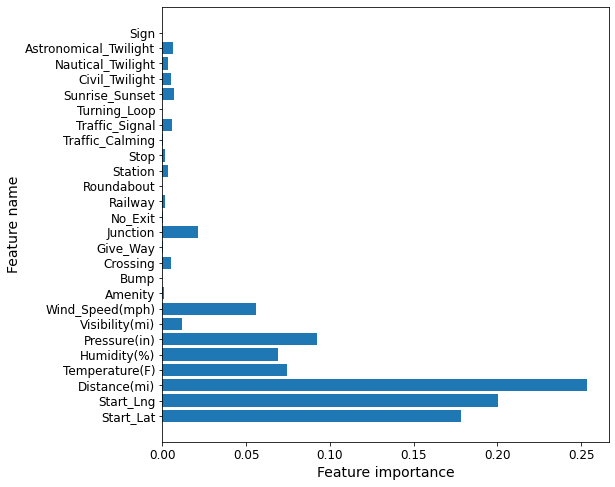

Feature importances: [1.78305098e-01 2.00468841e-01 2.53792259e-01 7.45583814e-02
 6.88123738e-02 9.20519009e-02 1.19793184e-02 5.60668378e-02
 1.26621280e-03 9.08563939e-05 5.04751148e-03 5.01266497e-04
 2.11428749e-02 4.97596650e-04 1.74541035e-03 0.00000000e+00
 3.58377798e-03 1.80204322e-03 1.37794255e-04 5.95126548e-03
 0.00000000e+00 7.17170984e-03 5.20505651e-03 3.45075116e-03
 6.37086240e-03 0.00000000e+00]


In [20]:
clf = DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)

train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

print('Accuracy of DT classifier on training set: {:.2f}'.format(train_score))
print('Accuracy of DT classifier on test set: {:.2f}'.format(test_score))

#plt.figure(figsize=(12,12), dpi=60)

# import features (call the function above)
plot_feature_importances(clf, X.columns)

plt.show()

print('Feature importances: {}'.format(clf.feature_importances_))

In [21]:
y.unique().astype('str')

array(['1', '2', '3', '4'], dtype='<U21')

In [22]:
import os
from graphviz import Source
from sklearn.tree import export_graphviz

In [23]:
# DOT data
export_graphviz(
        clf,
        out_file=os.path.join(IMAGES_PATH, "accident_tree1.dot"),
        feature_names=X.columns,
        class_names=y.unique().astype('str'),
        rounded=True,
        filled=True
    )

In [24]:
# Draw graph Please dont rerun !!!!! takes a lot of time
#Source.from_file(os.path.join(IMAGES_PATH, "accident_tree1.dot"))

## B. Decision Tree with Gini Method

Accuracy of DT classifier on training set: 1.00
Accuracy of DT classifier on test set: 0.64


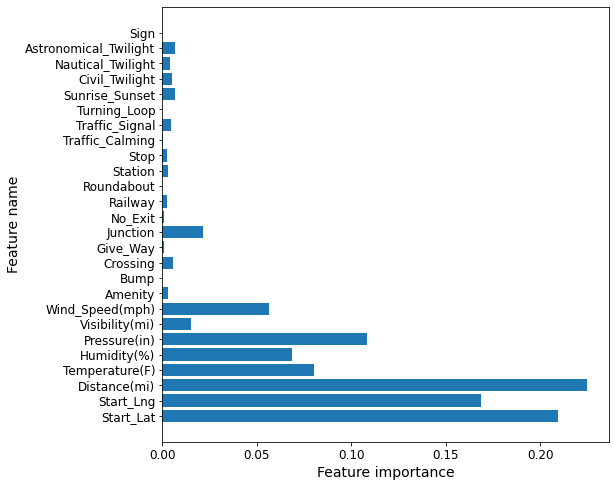

Feature importances: [2.09623880e-01 1.68873167e-01 2.25056104e-01 8.01530015e-02
 6.84453764e-02 1.08594694e-01 1.54401845e-02 5.62695754e-02
 2.83630035e-03 0.00000000e+00 5.40556365e-03 1.08814704e-03
 2.15938262e-02 7.60432512e-04 2.55158016e-03 0.00000000e+00
 3.10303607e-03 2.61399912e-03 2.24951629e-04 4.63325629e-03
 0.00000000e+00 6.95215522e-03 5.27376594e-03 3.89186263e-03
 6.61513948e-03 0.00000000e+00]


In [25]:
clf = DecisionTreeClassifier(criterion='gini').fit(X_train, y_train)

train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

print('Accuracy of DT classifier on training set: {:.2f}'.format(train_score))
print('Accuracy of DT classifier on test set: {:.2f}'.format(test_score))

#plt.figure(figsize=(12,12), dpi=60)

# import features (call the function above)
plot_feature_importances(clf, X.columns)

plt.show()

print('Feature importances: {}'.format(clf.feature_importances_))

In [26]:
# DOT data
export_graphviz(
        clf,
        out_file=os.path.join(IMAGES_PATH, "accident_tree2.dot"),
        feature_names=X.columns,
        class_names=y.unique().astype('str'),
        rounded=True,
        filled=True
    )

In [27]:
# Draw graph Please dont rerun !!!!! takes a lot of time
#Source.from_file(os.path.join(IMAGES_PATH, "accident_tree2.dot"))

## C. Model with K-Fold Cross-validation

In [28]:
#### Setup the tree classifier

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

#X=df_norm.iloc[:,2:]
#y=df_norm.iloc[:,1] 

targets = df_norm.iloc[:,1].unique().astype(str)
features = df_norm.iloc[:,2:].columns
X= np.c_[np.array(df_norm.iloc[:,2:])]
y= np.c_[np.array(df_norm.iloc[:,1])]

tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=40)

In [30]:
#### K-fold Setup

In [31]:
from sklearn.model_selection import KFold # import k-fold validation

k = 3
kf = KFold(n_splits=k, random_state=None, shuffle=True) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator

3

In [32]:
c1_avg_precision = 0
c2_avg_precision = 0
c3_avg_precision = 0
c4_avg_precision = 0

c1_avg_recall = 0
c2_avg_recall = 0
c3_avg_recall = 0
c4_avg_recall = 0

c1_avg_f1 = 0
c2_avg_f1 = 0
c3_avg_f1 = 0 
c4_avg_f1 = 0 

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    tree_clf.fit(X_train, y_train)
    y_pred = tree_clf.predict(X_test)
    
    # Print classification report
    target_names = targets
    result_metrics = classification_report(y_test, y_pred, target_names=targets)
    
    print(result_metrics)
    
    # Once you get dictionary of metrics, access the values using dictionary
    result_metrics_dict = classification_report(y_test, y_pred, target_names=targets, output_dict=True)
    
    print(result_metrics_dict)
    
    # this is an example to access a measure of each class
    c1_avg_precision += result_metrics_dict['1']['precision']
    c2_avg_precision += result_metrics_dict['2']['precision']
    c3_avg_precision += result_metrics_dict['3']['precision']
    c4_avg_precision += result_metrics_dict['4']['precision']
    
    # this is an example to access a measure of each class
    c1_avg_recall += result_metrics_dict['1']['recall']
    c2_avg_recall += result_metrics_dict['2']['recall']
    c3_avg_recall += result_metrics_dict['3']['recall']
    c4_avg_recall += result_metrics_dict['4']['recall']
    
    # this is an example to access a measure of each class
    c1_avg_f1 += result_metrics_dict['1']['f1-score']
    c2_avg_f1 += result_metrics_dict['2']['f1-score']
    c3_avg_f1 += result_metrics_dict['3']['f1-score']
    c4_avg_f1 += result_metrics_dict['4']['f1-score']
    
    


/Users/anjali/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anjali/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anjali/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anjali/op

              precision    recall  f1-score   support

           1       0.70      0.64      0.67      5330
           2       0.00      0.00      0.00      5272
           3       0.38      0.82      0.52      5268
           4       0.52      0.48      0.50      5330

    accuracy                           0.49     21200
   macro avg       0.40      0.48      0.42     21200
weighted avg       0.40      0.49      0.42     21200

{'1': {'precision': 0.703403902034039, 'recall': 0.6358348968105065, 'f1-score': 0.6679148600709499, 'support': 5330}, '2': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 5272}, '3': {'precision': 0.37938577303351123, 'recall': 0.8230827638572513, 'f1-score': 0.519374737976882, 'support': 5268}, '4': {'precision': 0.5172622652937614, 'recall': 0.4806754221388368, 'f1-score': 0.4982981620149762, 'support': 5330}, 'accuracy': 0.4852358490566038, 'macro avg': {'precision': 0.4000129850903279, 'recall': 0.48489827070164865, 'f1-score': 0.4213969400

/Users/anjali/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anjali/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anjali/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anjali/op

In [33]:
print('\n class 1: ', c1_avg_precision/k)
print('\n class 2: ', c2_avg_precision/k)
print('\n class 3: ', c3_avg_precision/k)
print('\n class 4: ', c4_avg_precision/k)


 class 1:  0.6998443478754032

 class 2:  0.0

 class 3:  0.3819766003753333

 class 4:  0.5117345052321439


In [34]:
print('\n class 1: ', c1_avg_recall/k)
print('\n class 2: ', c2_avg_recall/k)
print('\n class 3: ', c3_avg_recall/k)
print('\n class 4: ', c4_avg_recall/k)


 class 1:  0.6305505945279711

 class 2:  0.0

 class 3:  0.825989474189654

 class 4:  0.4792966506642995


In [35]:
print('\n class 1: ', c1_avg_f1/k)
print('\n class 2: ', c2_avg_f1/k)
print('\n class 3: ', c3_avg_f1/k)
print('\n class 4: ', c4_avg_f1/k)


 class 1:  0.6633898874777859

 class 2:  0.0

 class 3:  0.522372917364426

 class 4:  0.49497439323186293


In [36]:
#DOT data
export_graphviz(
        clf,
        out_file=os.path.join(IMAGES_PATH, "accident_tree3.dot"),
        feature_names=features,
        class_names=targets,
        rounded=True,
        filled=True
    )

In [37]:
# Don't Run again ... Takes time
#Source.from_file(os.path.join(IMAGES_PATH, "accident_tree3.dot"))

### Part2

Write a summary in Canvas. 